In [5]:
import yfinance as yf
import numpy as np

In [6]:
stocks = ["2330", "3443", "2303", "2317", "2412", "2454", "2353", "3008", "1218", "2498"]
# stocks = ["2330", "2317", "2454", "2308", "2412", "2881", "6505", "2382", "2882", "2303"]
a_pos = []
a_neg = []

b_pos = []
b_neg = []

c_pos = []
c_neg = []

for stock in stocks:
    result = yf.download(f"{stock}.TW", start = "2001-01-01", end = "2023-07-01", progress = False, show_errors = False)["Close"]
    pos, neg =[[] for i in range(2)]

    for i in range(1, len(result), 1):
        temp = (result[i] - result[i - 1]) / result[i - 1]

        if temp > 0:
            pos.append(temp)
        else:
            neg.append(-temp)
    a_pos.append(round((np.average(pos)), 4))
    a_neg.append(-round((np.average(neg)), 4))

    b_pos.append(round((np.average(pos) + np.std(pos)), 4))
    b_neg.append(-round((np.average(neg) + np.std(neg)), 4))

    c_pos.append(round((np.average(pos) + np.std(pos) * 2), 4))
    c_neg.append(-round((np.average(neg) + np.std(neg) * 2), 4))

In [7]:
print(a_pos)
print(a_neg)
print(b_pos)
print(b_neg)
print(c_pos)
print(c_neg)

[0.0155, 0.0255, 0.0184, 0.0159, 0.0091, 0.0204, 0.0189, 0.0232, 0.0186, 0.0231]
[-0.0121, -0.0201, -0.0139, -0.0123, -0.0061, -0.0172, -0.015, -0.0187, -0.0128, -0.0199]
[0.0292, 0.0488, 0.0357, 0.0316, 0.0213, 0.0408, 0.0369, 0.0432, 0.0382, 0.0442]
[-0.0246, -0.0403, -0.0284, -0.0265, -0.0172, -0.0354, -0.0305, -0.0385, -0.0281, -0.0398]
[0.0428, 0.0721, 0.053, 0.0473, 0.0336, 0.0612, 0.055, 0.0633, 0.0579, 0.0653]
[-0.0371, -0.0606, -0.0429, -0.0406, -0.0283, -0.0536, -0.0461, -0.0583, -0.0435, -0.0597]


In [8]:
stocks = ["2330", "3443", "2303", "2317", "2412", "2454", "2353", "3008", "1218", "2498"]
# stocks = ["2330", "2317", "2454", "2308", "2412", "2881", "6505", "2382", "2882", "2303"]
# date = ["2023-01-12", "2023-03-15", "2023-04-28", "2023-02-23", "2023-02-02", "2023-05-18", "2023-05-09", "2023-05-11", "2023-05-26", "2023-04-26"]

th = [0.0155, 0.0255, 0.0184, 0.0159, 0.0091, 0.0204, 0.0189, -0.0187, -0.0128, 0.0231]

# th = [0.0155, 0.0159, -0.0172, 0.0183, 0.0091, 0.0135, 0.013, 0.0165, 0.0143, -0.0139]
result1 = [[0 for i in range(14)] for i in range(10)]

for idx, stock in enumerate(stocks):
    # result = yf.download(f"{stock}.TW", start = date[idx], end = "2023-07-14", progress = False, show_errors = False)["Close"][:15]
    result = yf.download(f"{stock}.TW", start = "2023-02-07", end = "2023-03-02", progress = False, show_errors = False)["Close"]

    for i in range(1, len(result), 1):
    # for i in range(1, 15, 1):
        temp = (round(result[i], 2) - round(result[0], 2)) / round(result[0], 2)
        print(i, result[0], result[i], round(temp, 4))
        if idx == 7 or idx == 8:
        # if idx == 2 or idx == 9:
            if temp < th[idx]:
                result1[idx][i - 1] += 1
        else:
            if temp > th[idx]:
                result1[idx][i - 1] += 1
    print("-----")

1 523.0 540.0 0.0325
2 523.0 540.0 0.0325
3 523.0 545.0 0.0421
4 523.0 541.0 0.0344
5 523.0 545.0 0.0421
6 523.0 525.0 0.0038
7 523.0 528.0 0.0096
8 523.0 518.0 -0.0096
9 523.0 517.0 -0.0115
10 523.0 516.0 -0.0134
11 523.0 507.0 -0.0306
12 523.0 518.0 -0.0096
13 523.0 511.0 -0.0229
14 523.0 522.0 -0.0019
-----
1 841.0 925.0 0.0999
2 841.0 920.0 0.0939
3 841.0 910.0 0.082
4 841.0 898.0 0.0678
5 841.0 911.0 0.0832
6 841.0 926.0 0.1011
7 841.0 958.0 0.1391
8 841.0 976.0 0.1605
9 841.0 995.0 0.1831
10 841.0 1035.0 0.2307
11 841.0 1015.0 0.2069
12 841.0 1115.0 0.3258
13 841.0 1160.0 0.3793
14 841.0 1180.0 0.4031
-----
1 49.150001525878906 50.5 0.0275
2 49.150001525878906 50.5 0.0275
3 49.150001525878906 50.79999923706055 0.0336
4 49.150001525878906 49.75 0.0122
5 49.150001525878906 50.400001525878906 0.0254
6 49.150001525878906 49.900001525878906 0.0153
7 49.150001525878906 50.099998474121094 0.0193
8 49.150001525878906 50.0 0.0173
9 49.150001525878906 50.5 0.0275
10 49.150001525878906 50.5

In [9]:
for i in range(10):
    print(result1[i])
a = []
for i in range(14):
    temp = 0

    for j in range(10):
        if result1[j][i] == 1:
            temp += 1
    a.append(temp)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


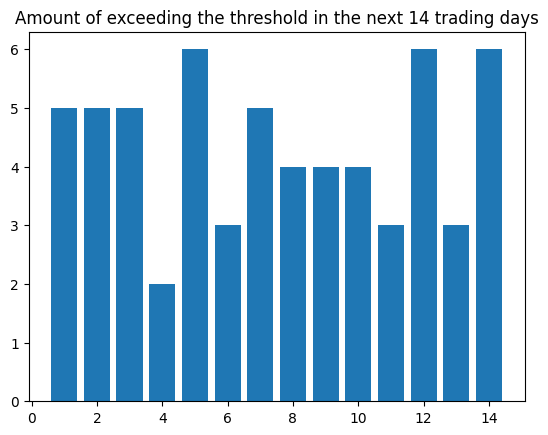

In [10]:
import matplotlib.pyplot as plt

x = [x + 1 for x in range(14)]

fig, ax = plt.subplots()
ax.bar(x, a)
ax.set_title('Amount of exceeding the threshold in the next 14 trading days')

plt.show()